# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

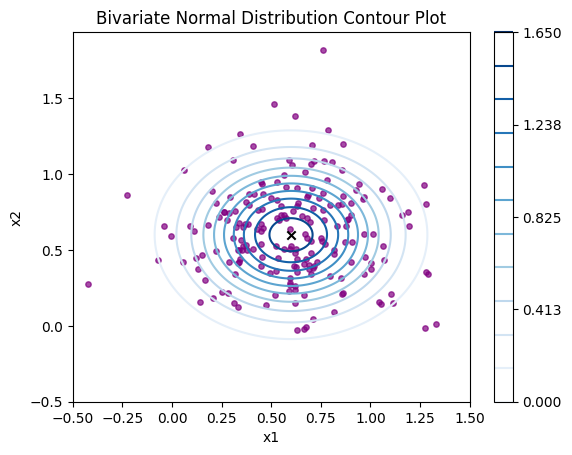

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# --------------------------------------------------------------------
# PROBLEM 1A
# --------------------------------------------------------------------
mean = np.array([0.6, 0.6])                         # mean = 0.6
covariance_matrix = np.array([[0.1, 0], [0, 0.1]])  # variance = 0.1
m_samples = 200                                     # m = 200 samples/points
np.random.seed(42)
random_samples = np.random.multivariate_normal(mean, covariance_matrix, m_samples)

# Create a bivariate normal distribution object
bivariate_normal = multivariate_normal(mean=mean, cov=covariance_matrix)
xy_range = np.linspace(-0.5, 1.5, 200)
x, y = np.meshgrid(xy_range, xy_range) # this returns coordinate matrices from coordinate vectors to create a grid of points for 2D plotting
pos = np.dstack((x, y))                # this stacks the 2D arrays x and y along the third axis to create a 3D array
contour = plt.contour(x, y, bivariate_normal.pdf(pos), cmap='Blues', levels=10)

# --------------------------------------------------------------------
# PROBLEM 1B
# --------------------------------------------------------------------
# Plot
plt.scatter(random_samples[:, 0], random_samples[:, 1], alpha=0.7, label='Generated Samples', color='purple', s=15)
plt.scatter(mean[0], mean[1], color='black', marker='x', label='Mean') 
plt.xlabel('x1'); plt.ylabel('x2'); plt.title('Bivariate Normal Distribution Contour Plot')
cbar = plt.colorbar(contour, ticks=np.linspace(0, contour.cvalues.max(), 5))
plt.show()


## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vectors onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ?

### Problem 2B (5 points)

What determines the positive or negative correlations between the components ?

### Problem 2C (10 points)

Plot the projected vectors and show whether or not the projection agrees with the positive or negative correlations of the original matrix.



### Problem 2A ANSWER:

For a given matrix A, the SVD is given by A=UΣV^T, where U and V are orthogonal matrices and Σ is a diagonal matrix containing the singular values.
The principal components of a matrix are the directions along which the data varies the most. These directions are determined by the columns of the U matrix. The first column of U corresponds to the first principal component, the second column to the second principal component, and so on. The principal components are ordered in decreasing order of importance, meaning the first principal component captures the most variation in the data.

### Problem 2B ANSWER:

The positive or negative correlations between the components are reflected in the signs of the corresponding elements in the columns of the U matrix. If the elements in a column have the same sign, the features associated with those components are positively correlated. If the elements have opposite signs, the variables are negatively correlated.

### Problem 2C ANSWER:

In [67]:
np.random.seed(42)
covariance_matrix = np.array([[4, 2, 1],
                              [2, 3, 1.5],
                              [1, 1.5, 2]])

mean = np.zeros(3)
random_vector = np.random.multivariate_normal(mean, covariance_matrix, size=1000)

# 1) Perform Singular Value Decomposition (SVD) on the covariance matrix to obtain the singular value decomposition
U, S, Vt = np.linalg.svd(covariance_matrix)

# 2) Project the simulated vectors onto the subspace spanned by the first two principal components
# a) We do this by selecting the first two columns of U to define a subspace capturing the most significant variations in the data.
# b) Then, take the dot product of each vector with the selected columns of U
projection_matrix = U[:, :2]
projected_vectors = random_vector.dot(projection_matrix)

# U matrix contains the principal components (directions of maximum variance)
print("U = ")
print(U)
print("\n First Principal Component in Column 1: \n",
      "All elements have the same sign (negative). Variables associated with this component are positively correlated. \n",
      "Second Principal Component in Column 2: \n", 
      "Elements have mixed signs. Variables associated with this component may have both positive and negative correlations.")

U = 
[[-0.70173922  0.68097512  0.20936798]
 [-0.60421021 -0.41315066 -0.68134907]
 [-0.37748125 -0.60463164  0.70137614]]

 First Principal Component in Column 1: 
 All elements have the same sign (negative). Variables associated with this component are positively correlated. 
 Second Principal Component in Column 2: 
 Elements have mixed signs. Variables associated with this component may have both positive and negative correlations.


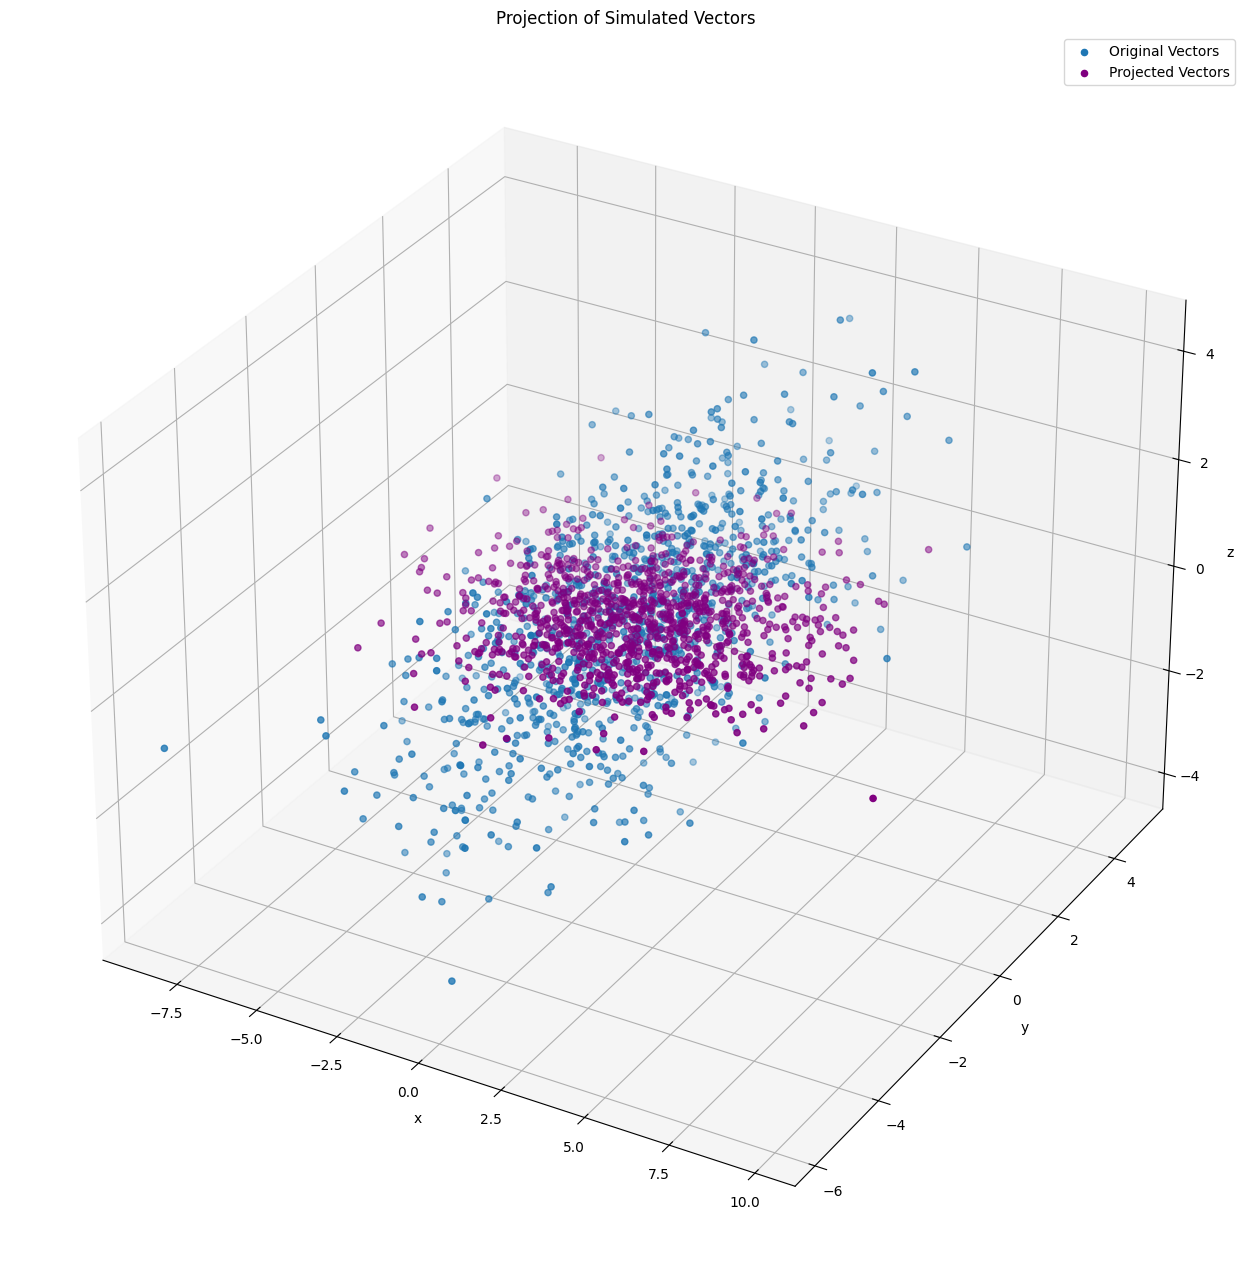

In [69]:
# 3) Plot
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(random_vector[:, 0], 
           random_vector[:, 1], 
           random_vector[:, 2], 
           label='Original Vectors')
ax.scatter(projected_vectors[:, 0], 
           projected_vectors[:, 1], 
           np.zeros_like(projected_vectors[:, 0]), 
           label='Projected Vectors', 
           color = 'purple')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Projection of Simulated Vectors')

ax.legend()
plt.show()

### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed